In [10]:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
import pandas as pd
import numpy as np 

In [11]:

categoryOne = pd.read_csv('smallData.csv',  encoding="latin-1"); 
categoryOne = categoryOne[["Domain","category"]] 

print(categoryOne.head(200))  

                  Domain  category
0           andyburd.com         1
1           musicals.com        10
2            cultura.com        10
3               ifly.com        10
4             mirror.com        10
..                   ...       ...
123    freecellphone.com        10
124         drumsets.com        10
125      golfresorts.com        10
126  onlinepokerroom.com        10
127    horsesupplies.com        10

[128 rows x 2 columns]


In [12]:
string = '1abc'
string[:1].isdigit()

True

In [13]:

categoryOne['DomainOnly'] = categoryOne.apply(lambda row:  row.Domain.replace(".com", "") if '.com' in row.Domain else row.Domain, axis=1) 

In [14]:

categoryOne['StartsNumber'] = categoryOne.apply(lambda row: 1 if row.DomainOnly[:1].isdigit() else 0 , axis=1)
categoryOne['TotalLength'] = categoryOne.apply(lambda row: len(row.DomainOnly), axis=1)

In [15]:
categoryOne['LengthGreater20'] = categoryOne.apply(lambda row: 1 if len(row.DomainOnly)> 20 else 0, axis=1)
categoryOne['LengthGreater15'] = categoryOne.apply(lambda row: 1 if len(row.DomainOnly)> 15 else 0, axis=1)
categoryOne['LengthGreater10'] = categoryOne.apply(lambda row: 1 if len(row.DomainOnly)> 10 else 0, axis=1)
categoryOne['LengthGreater5'] = categoryOne.apply(lambda row: 1 if len(row.DomainOnly)> 5 else 0, axis=1)
categoryOne['LengthGreater3'] = categoryOne.apply(lambda row: 1 if len(row.DomainOnly)> 3 else 0, axis=1)

In [16]:
categoryTwo = categoryOne.apply(lambda row: row.DomainOnly if '.' in row.DomainOnly else None, axis=1)

In [17]:

print(categoryOne.head(200))  

                  Domain  category       DomainOnly  StartsNumber  \
0           andyburd.com         1         andyburd             0   
1           musicals.com        10         musicals             0   
2            cultura.com        10          cultura             0   
3               ifly.com        10             ifly             0   
4             mirror.com        10           mirror             0   
..                   ...       ...              ...           ...   
123    freecellphone.com        10    freecellphone             0   
124         drumsets.com        10         drumsets             0   
125      golfresorts.com        10      golfresorts             0   
126  onlinepokerroom.com        10  onlinepokerroom             0   
127    horsesupplies.com        10    horsesupplies             0   

     TotalLength  LengthGreater20  LengthGreater15  LengthGreater10  \
0              8                0                0                0   
1              8             

In [18]:
print(categoryTwo.head(200)) 

0      None
1      None
2      None
3      None
4      None
       ... 
123    None
124    None
125    None
126    None
127    None
Length: 128, dtype: object


In [19]:
print(categoryTwo.unique())

[None 'game.cn']


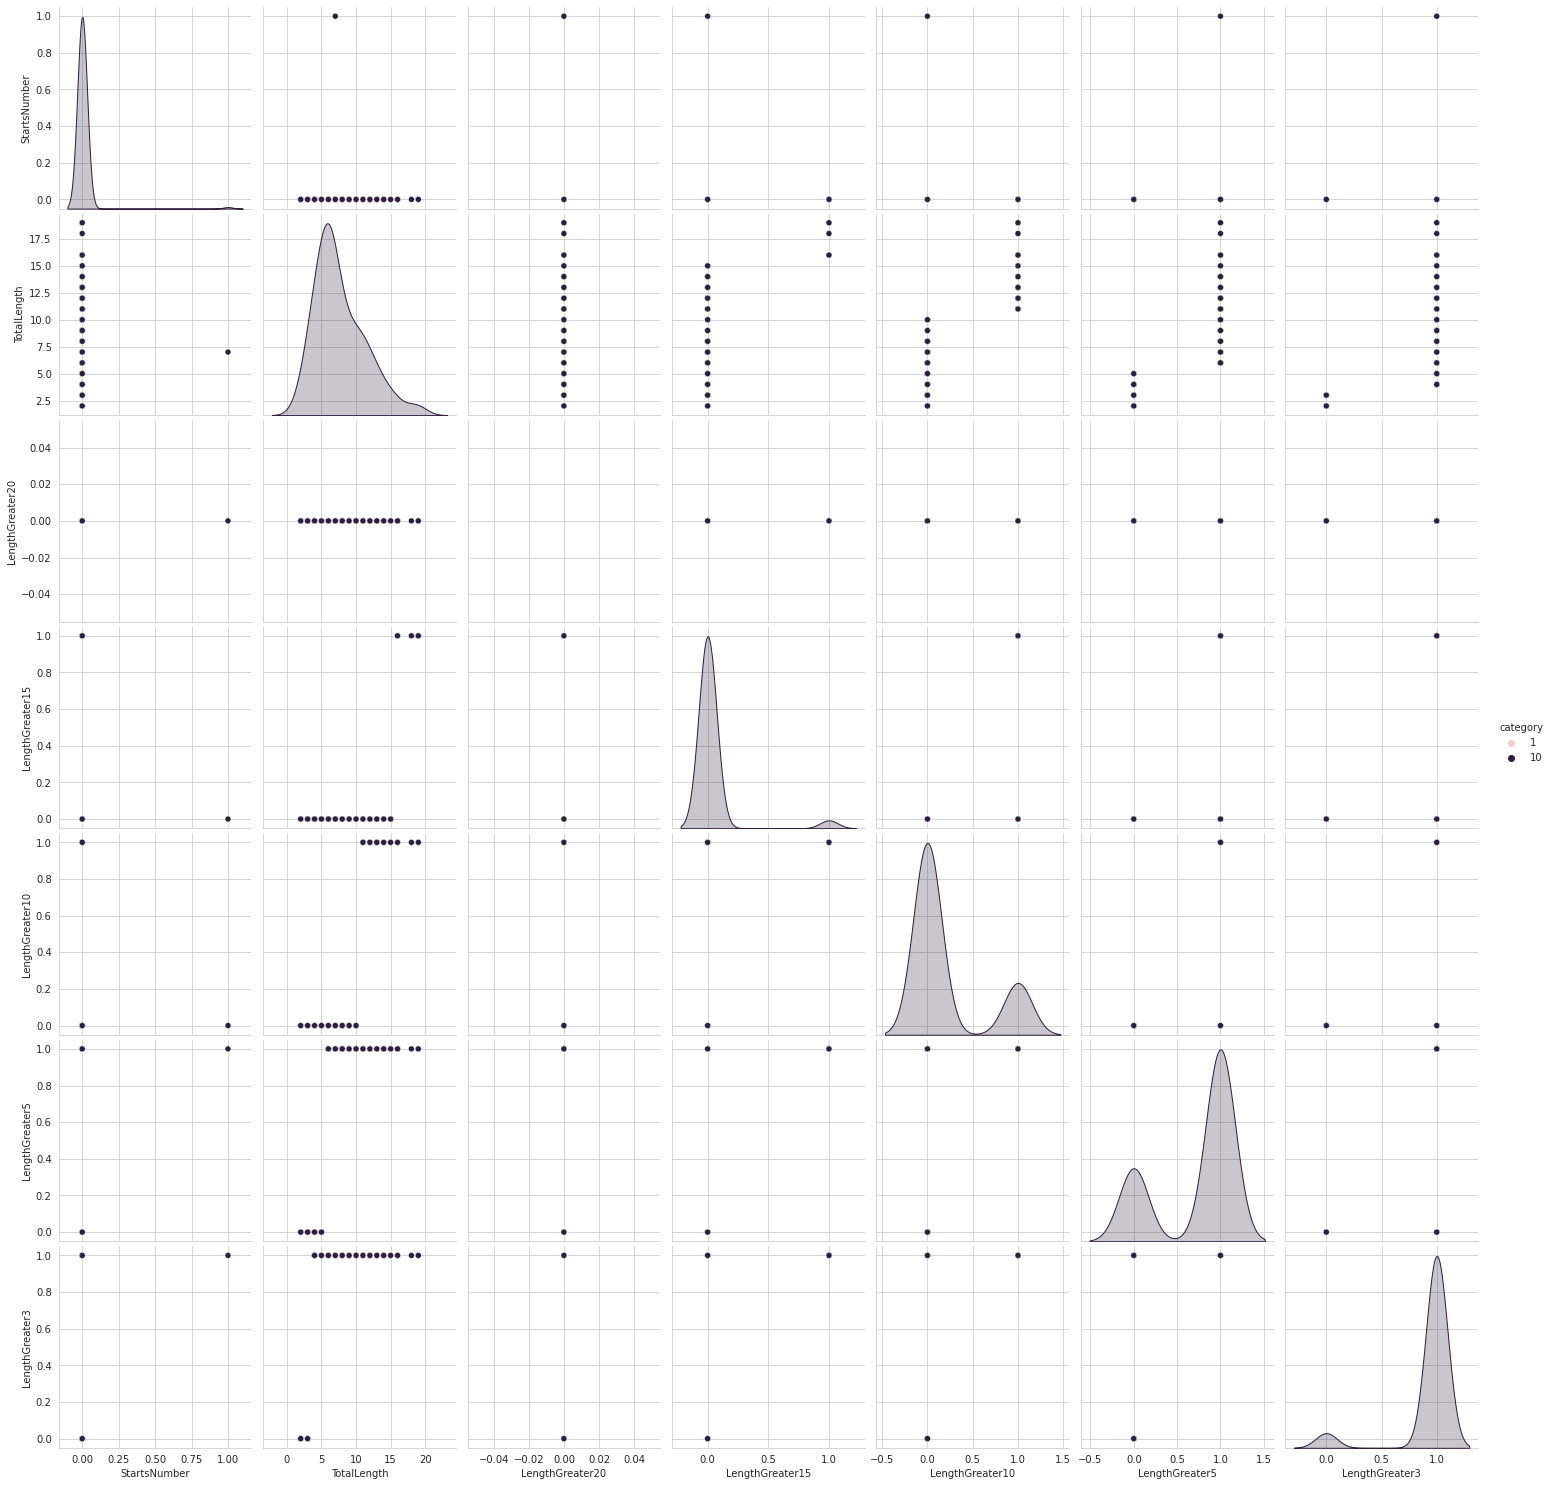

In [20]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(categoryOne, hue='category', height=3);
plt.show()



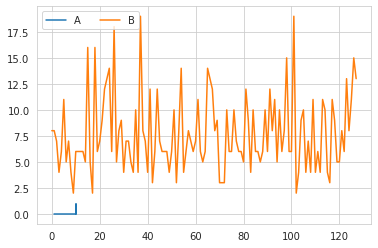

In [21]:

plt.plot(categoryOne["category"], categoryOne["StartsNumber"], categoryOne["TotalLength"])
plt.legend('ABCDEF', ncol=2, loc='upper left');
plt.show()

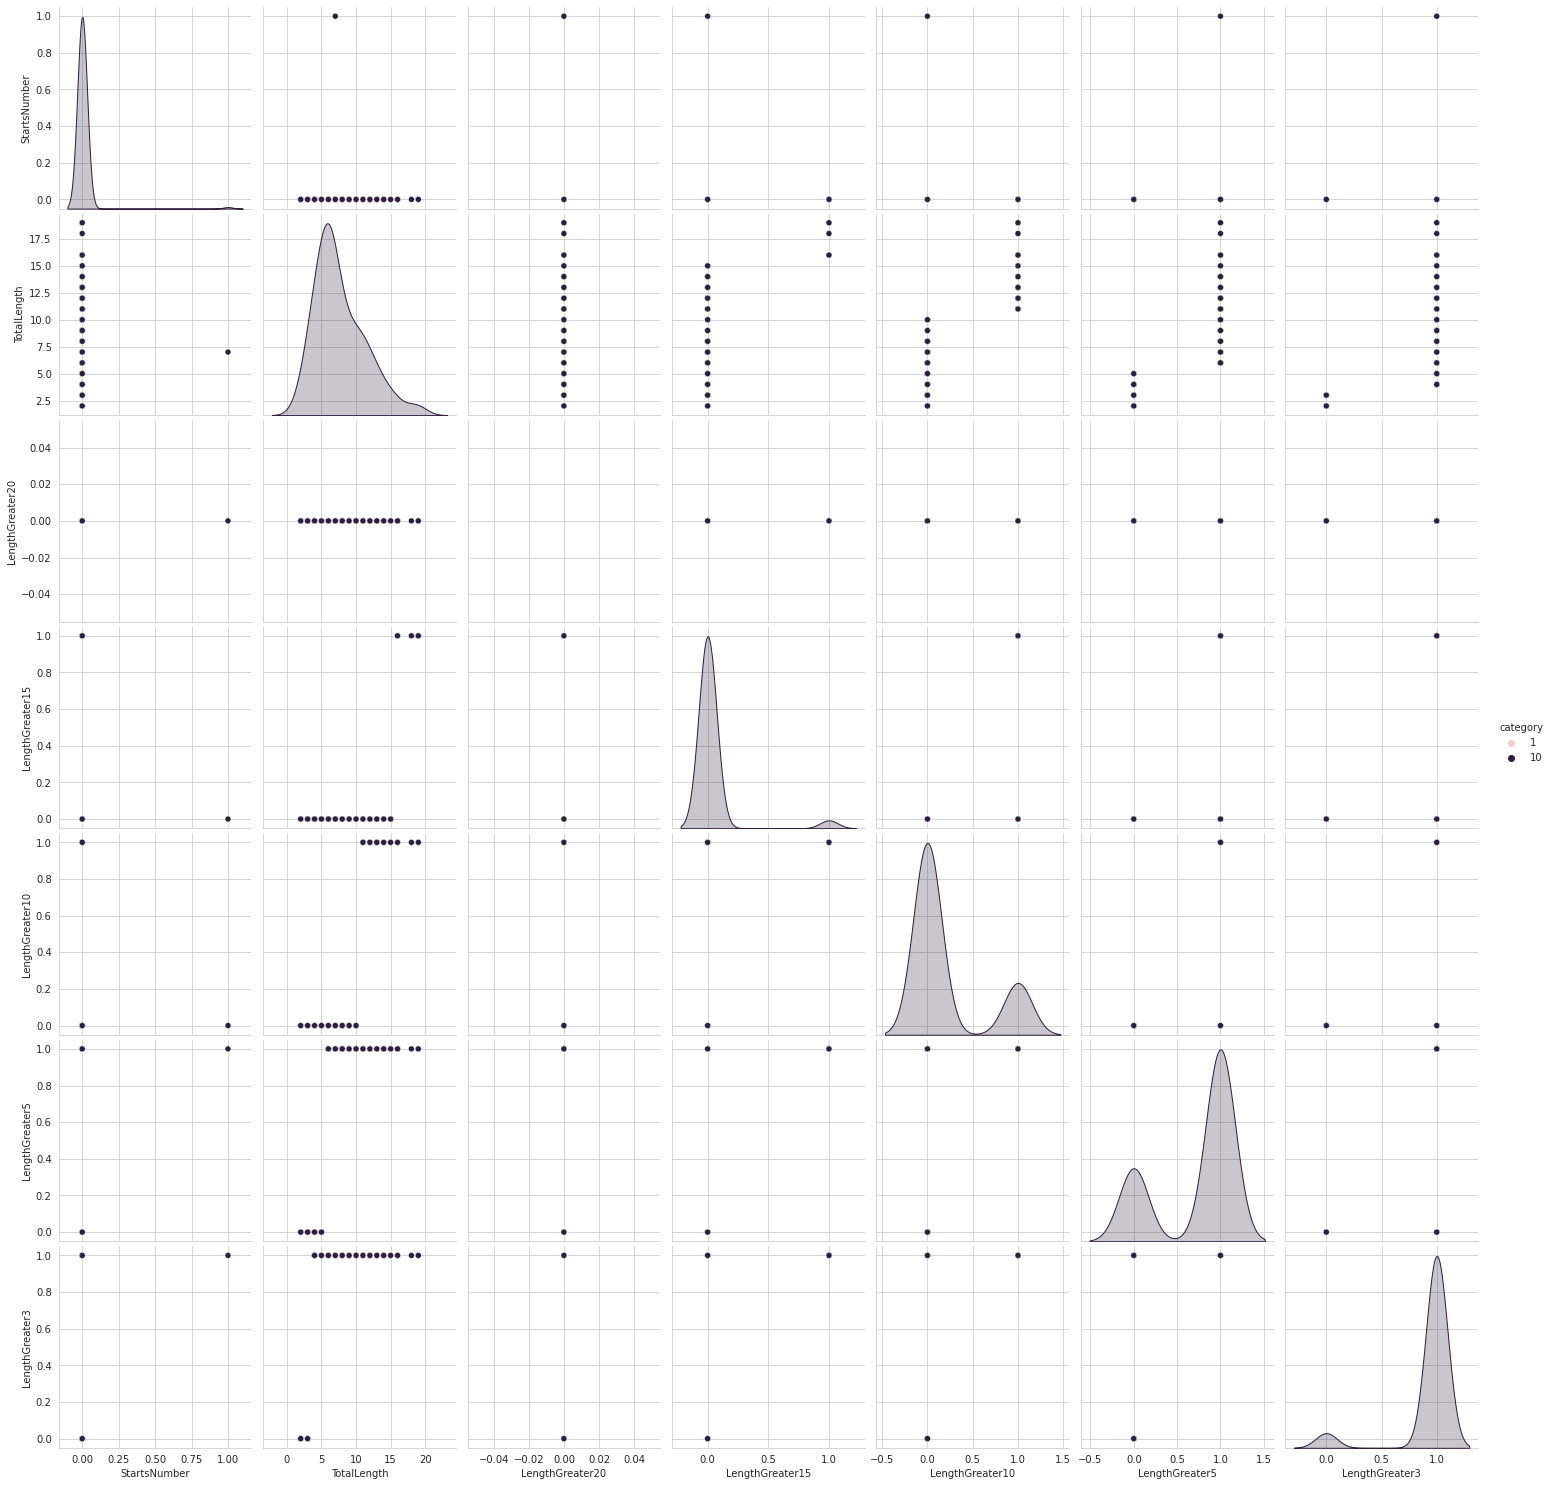

In [22]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(categoryOne, hue='category', height=3);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


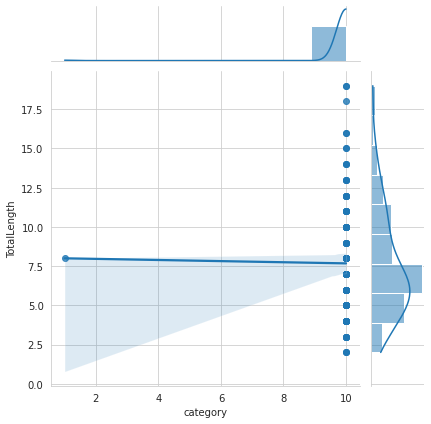

In [25]:
sns.jointplot("category", "TotalLength", data=categoryOne, kind='reg');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


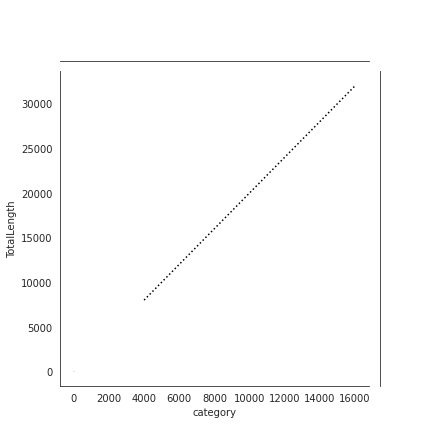

In [26]:
with sns.axes_style('white'):
    g = sns.jointplot("category", "TotalLength", categoryOne, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

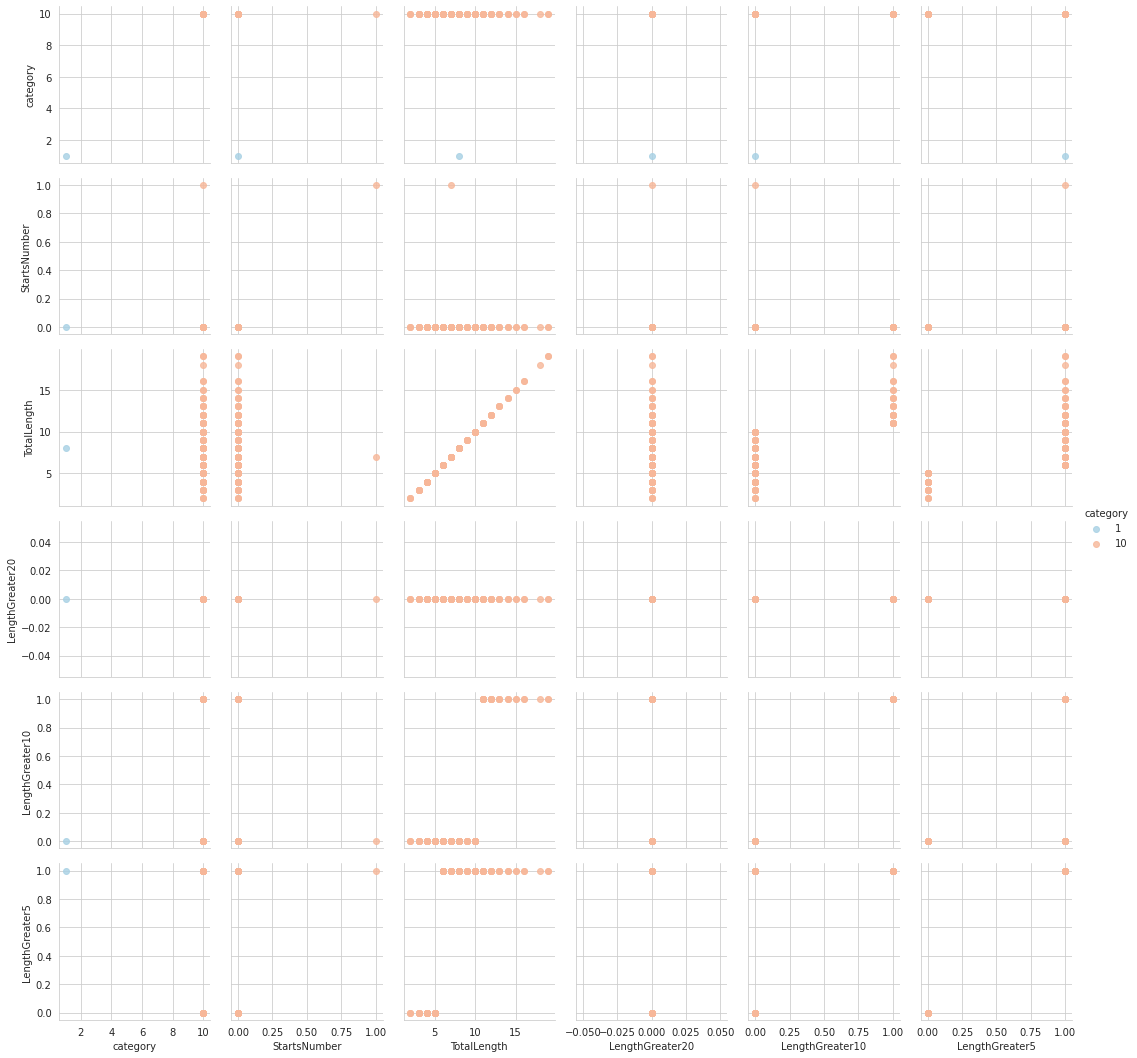

In [27]:
g = sns.PairGrid(categoryOne, vars=['category', 'StartsNumber', 'TotalLength', 'LengthGreater20', 'LengthGreater10', 'LengthGreater5'],
                 hue='category', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


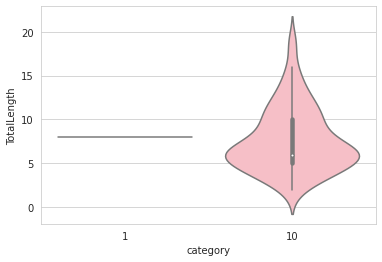

In [28]:
sns.violinplot("category", "TotalLength", data=categoryOne,
               palette=["lightblue", "lightpink"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


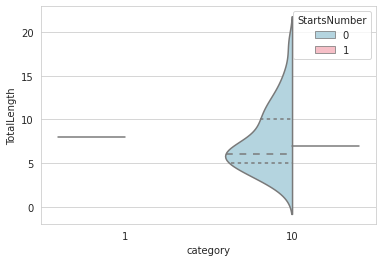

In [29]:
with sns.axes_style(style=None):
    sns.violinplot("category", "TotalLength", hue="StartsNumber", data=categoryOne,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

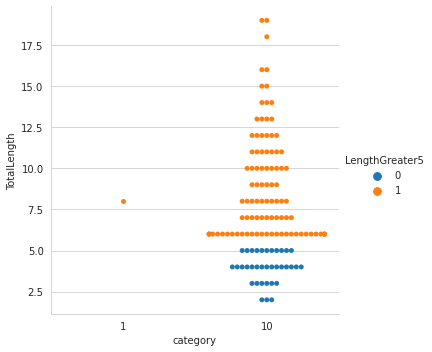

In [33]:
sns.catplot(data=categoryOne, kind="swarm", x="category", y="TotalLength", hue="LengthGreater5")

### **Machine Learning Method**

In [35]:
categoryOne

,Domain,category,DomainOnly,StartsNumber,TotalLength,LengthGreater20,LengthGreater15,LengthGreater10,LengthGreater5,LengthGreater3
0,andyburd.com,1,andyburd,0,8,0,0,0,1,1
1,musicals.com,10,musicals,0,8,0,0,0,1,1
2,cultura.com,10,cultura,0,7,0,0,0,1,1
3,ifly.com,10,ifly,0,4,0,0,0,0,1
4,mirror.com,10,mirror,0,6,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
123,freecellphone.com,10,freecellphone,0,13,0,0,1,1,1
124,drumsets.com,10,drumsets,0,8,0,0,0,1,1
125,golfresorts.com,10,golfresorts,0,11,0,0,1,1,1
126,onlinepokerroom.com,10,onlinepokerroom,0,15,0,0,1,1,1


In [39]:

resultData = categoryOne.drop(['Domain'],axis=1)
resultData = resultData.drop(['DomainOnly'],axis=1)
resultData

,category,StartsNumber,TotalLength,LengthGreater20,LengthGreater15,LengthGreater10,LengthGreater5,LengthGreater3
0,1,0,8,0,0,0,1,1
1,10,0,8,0,0,0,1,1
2,10,0,7,0,0,0,1,1
3,10,0,4,0,0,0,0,1
4,10,0,6,0,0,0,1,1
...,...,...,...,...,...,...,...,...
123,10,0,13,0,0,1,1,1
124,10,0,8,0,0,0,1,1
125,10,0,11,0,0,1,1,1
126,10,0,15,0,0,1,1,1


In [40]:

x_data = resultData.drop(['category'],axis=1)
y_data = resultData['category']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['StartsNumber','TotalLength', 'LengthGreater20', 'LengthGreater15', 'LengthGreater10', 'LengthGreater5', 'LengthGreater3'])
resultData.head()

,category,StartsNumber,TotalLength,LengthGreater20,LengthGreater15,LengthGreater10,LengthGreater5,LengthGreater3
0,1,0,8,0,0,0,1,1
1,10,0,8,0,0,0,1,1
2,10,0,7,0,0,0,1,1
3,10,0,4,0,0,0,0,1
4,10,0,6,0,0,0,1,1


In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[26]]
Classification Report:
              precision    recall  f1-score   support

          10       1.00      1.00      1.00        26

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Accuracy: 1.0


### **Deep Learning Method**

In [43]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing

DeepData = categoryOne;# pd.read_csv('smallData.csv',  encoding="latin-1"); 

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
DeepData['DomainOnly']= label_encoder.fit_transform(DeepData['DomainOnly'])


# split into input (X) and output (y) variables
X = DeepData.drop(['category','Domain'],axis = 1)
y = DeepData.drop(['DomainOnly','Domain','StartsNumber','TotalLength','LengthGreater20','LengthGreater15','LengthGreater10','LengthGreater5','LengthGreater3'],axis = 1) 
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=50, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
13/13 [==============================] - 1s 2ms/step - loss: -70.5066 - accuracy: 0.0078
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: -99.3278 - accuracy: 0.0078 
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: -128.4580 - accuracy: 0.0078
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: -155.7795 - accuracy: 0.0078
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: -182.9159 - accuracy: 0.0078
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: -209.9826 - accuracy: 0.0078
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: -237.6752 - accuracy: 0.0078
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: -265.0341 - accuracy: 0.0078
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: -292.6682 - accuracy: 0.0078
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: -321.5019 - accurac